<a href="https://colab.research.google.com/github/Henil21/Intro_to_computer_vision_and_CNN/blob/main/Computer_vision_CNN_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Architecture of CNN
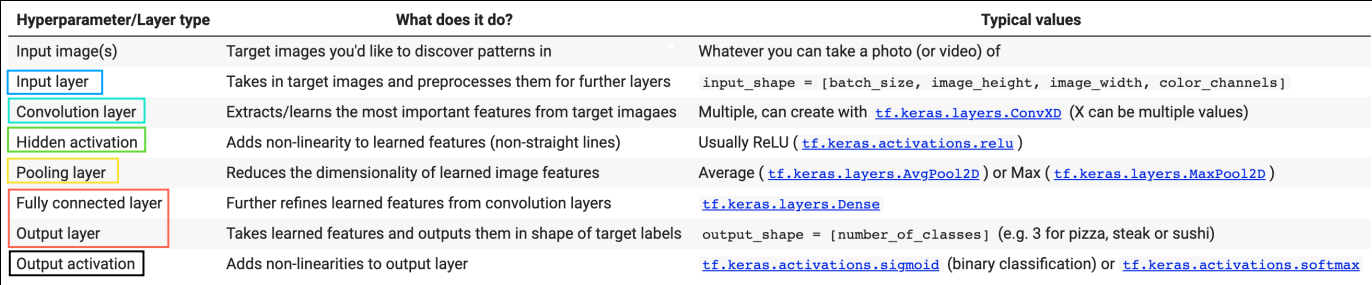

# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow

computer vision is the practice of writing algorithms which can discover pattern in visual data.

# Get The data


In [1]:
import zipfile
# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzipping
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-11-02 10:57:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.132.128, 74.125.202.128, 74.125.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.132.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   105MB/s    in 1.0s    

2022-11-02 10:57:17 (105 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect data (become one with data)

* A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.


* Wtih this being said, let's inspect the data we just downloaded.

* The file structure has been formatted to be in a typical format you might use for working with images.


In [2]:
!ls pizza_steak

test  train


In [3]:
# !ls pizza_steak/train/pizzas
import os
# walk thorugh pizza_steak directory and list number of files
for dirpath , dirname, filenames in os.walk("pizza_steak"):
  print(f"there are {len(dirname)} directories and {len(filenames)} images is '{dirpath}'")

there are 2 directories and 0 images is 'pizza_steak'
there are 2 directories and 0 images is 'pizza_steak/train'
there are 0 directories and 750 images is 'pizza_steak/train/pizza'
there are 0 directories and 750 images is 'pizza_steak/train/steak'
there are 2 directories and 0 images is 'pizza_steak/test'
there are 0 directories and 250 images is 'pizza_steak/test/pizza'
there are 0 directories and 250 images is 'pizza_steak/test/steak'


In [4]:
# another way to find number of image in file
num_steak_img_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_img_train

750

**To Visualize our images lets get clas name programmatically**

In [5]:
# get the class name programmatically
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_name=np.array(sorted([item.name for item in data_dir.glob("*")])) # created a list of class_name from the subdirectories
print(class_name)

['pizza' 'steak']


In [6]:
# lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
  # setup the target directory (we will view images from here)
  target_folder=target_dir+target_class

  # get a random image path
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)
  # Read in the image and plot it using matplotlib
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.axis("off");
  print(f"img shape:{img.shape}")
  
  return img


['2280345.jpg']
img shape:(512, 512, 3)


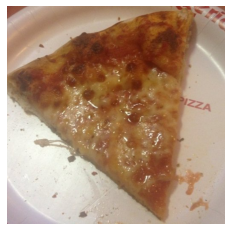

In [7]:
# View random image
img=view_random_image(target_dir="pizza_steak/train/",
                      target_class="pizza")

In [8]:
type(img)

numpy.ndarray

In [9]:
# converting array into tensor
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[132,  63,  56],
        [131,  62,  55],
        [130,  61,  54],
        ...,
        [136,  79,  52],
        [137,  77,  53],
        [139,  79,  55]],

       [[132,  63,  56],
        [132,  63,  56],
        [132,  63,  56],
        ...,
        [138,  78,  54],
        [141,  81,  57],
        [145,  85,  61]],

       [[133,  65,  56],
        [134,  66,  57],
        [136,  68,  59],
        ...,
        [135,  75,  51],
        [139,  79,  55],
        [145,  84,  63]],

       ...,

       [[171, 143, 155],
        [177, 149, 161],
        [183, 157, 168],
        ...,
        [184, 169, 162],
        [182, 167, 160],
        [180, 165, 158]],

       [[152, 122, 134],
        [163, 133, 145],
        [176, 148, 160],
        ...,
        [183, 168, 161],
        [183, 168, 161],
        [182, 167, 160]],

       [[132, 100, 113],
        [147, 115, 128],
        [167, 137, 149],
        ...,
        [183, 168, 16

In [10]:
# view thr img shape
img.shape
# return (width,height,colour channel)

(512, 512, 3)

>**🔑Note**: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.

In [11]:
# Get all the pixel value between 0 and 1
img/225

array([[[0.58666667, 0.28      , 0.24888889],
        [0.58222222, 0.27555556, 0.24444444],
        [0.57777778, 0.27111111, 0.24      ],
        ...,
        [0.60444444, 0.35111111, 0.23111111],
        [0.60888889, 0.34222222, 0.23555556],
        [0.61777778, 0.35111111, 0.24444444]],

       [[0.58666667, 0.28      , 0.24888889],
        [0.58666667, 0.28      , 0.24888889],
        [0.58666667, 0.28      , 0.24888889],
        ...,
        [0.61333333, 0.34666667, 0.24      ],
        [0.62666667, 0.36      , 0.25333333],
        [0.64444444, 0.37777778, 0.27111111]],

       [[0.59111111, 0.28888889, 0.24888889],
        [0.59555556, 0.29333333, 0.25333333],
        [0.60444444, 0.30222222, 0.26222222],
        ...,
        [0.6       , 0.33333333, 0.22666667],
        [0.61777778, 0.35111111, 0.24444444],
        [0.64444444, 0.37333333, 0.28      ]],

       ...,

       [[0.76      , 0.63555556, 0.68888889],
        [0.78666667, 0.66222222, 0.71555556],
        [0.81333333, 0

## An end-to-end examplel
let's build a CNN to find the patterns in our images 


* Load our images
* Preprocess our images
* Build a CNN to find patterm in our images
* Compile our CNN
* Fit the CNN to our training data

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)


# preprocess data get pixel value between 0 and 1 its also called scaling/normalization
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)


# setup path for data dir
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"


# import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

valid_data=valid_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

# Build CNN model (same as Tiny VGG on the CNN explainer website)
model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),

     tf.keras.layers.Conv2D(10,3,activation='relu'),

     tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid",
                              ),

     tf.keras.layers.Conv2D(10,3,activation='relu'),
     tf.keras.layers.Conv2D(10,3,activation='relu'),

     tf.keras.layers.MaxPool2D(2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history=model_1.fit(train_data,
                    epochs=5,
                    validation_data=valid_data,
                    steps_per_epoch=len(train_data),
                    validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 351ms/step - loss: 0.5804 - accuracy: 0.6627 - val_loss: 0.5239 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4331 - accuracy: 0.8080 - val_loss: 0.3368 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3850 - accuracy: 0.8340 - val_loss: 0.3622 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3454 - accuracy: 0.8647 - val_loss: 0.2859 - val_accuracy: 0.8880
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3119 - accuracy: 0.8707 - val_loss: 0.2908 - val_accuracy: 0.8740


In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# using same model as before


In [14]:
import tensorflow as tf
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
                           
])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 223ms/step - loss: 2.1371 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.4853 - val_loss: 0.6931 - val_accuracy: 0.5000


In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters in model_2 CNN model_1 was better lets try to improve it.

In [16]:
import  tensorflow as tf
tf.random.set_seed(42)
model_3=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),

])
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 186ms/step - loss: 3.3822 - accuracy: 0.6187 - val_loss: 0.5472 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 9s 196ms/step - loss: 0.6457 - accuracy: 0.7193 - val_loss: 0.4419 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 8s 178ms/step - loss: 0.8301 - accuracy: 0.7073 - val_loss: 0.5872 - val_accuracy: 0.6920
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.5464 - accuracy: 0.7540 - val_loss: 0.4442 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 8s 179ms/step - loss: 0.5360 - accuracy: 0.7753 - val_loss: 0.4205 - val_accuracy: 0.7900


In [17]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


>🔑**Note** a convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different features in an image

## Binary classification: Let's break it down

We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied
Let's step through each.

### 1. Become one with data

['2260231.jpg']
img shape:(512, 512, 3)
['698251.jpg']
img shape:(512, 512, 3)


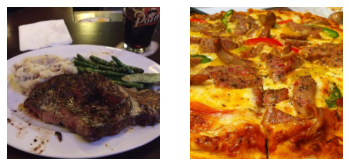

In [18]:
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")


### 2. Preprocess the data (prepare it for a model)

In [19]:
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"


our next step is to turn our data into **batches**

A batch is small subset of data. Rather than look at all ~100000(arbitrary number) images at one time , a model might only look at 32 at a time.

It does this for couple of reasons:
  
  1. 100000 images (or more)  might not fit into the memory of your processor(GPU) 

In [20]:
#  Create train and test data generator and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [21]:
# load in our images and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            batch_size=32)

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224,224),#height and width
                                            class_mode="binary",
                                            batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [22]:
# get a sample of traning data batches
images,labels=train_data.next()#get the next batch of images/labels in train_data
len(images) 


32

In [23]:
# get the first 2 images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

### 3. creating a CNN model(start with a baseline)


A baseline is a relatively simple model or existing result that you setup when beginning a machine experimenting , you try to beat the baseline.

> 🔑 **Note** In DL there is almost an infinite amount of architecture we could create.so one of the best way to get started is to start with something simple and see if it works on your data and then introduce complexity as required.

In [24]:
#  Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D, Activation
from tensorflow.keras import Sequential

# creating the model
model_4 =Sequential([
    Conv2D(filters=10, #filter is the number of sliding window going across an inputs
           kernel_size=3, # The size of the sliding window going across an input
           strides=1, # the size of the step the sliding window takes across an input
           padding="valid", # if same output shape is same as input and if valid out put shape get compressed
           activation="relu", 
           input_shape=(224,224,3)),#specify input shape
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1,activation="sigmoid")
])

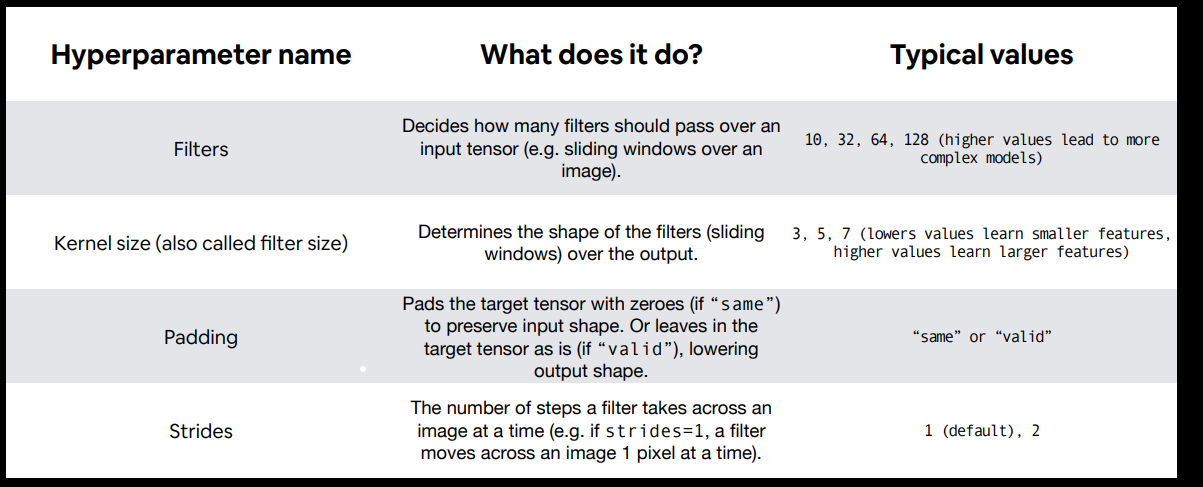

In [25]:
model_4.compile(
     loss=  "binary_crossentropy",
     optimizer=Adam(),
     metrics=["accuracy"] 
)

### 4. Fitting our model

In [26]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), 
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 201ms/step - loss: 1.7804 - accuracy: 0.5607 - val_loss: 0.6495 - val_accuracy: 0.5400
Epoch 2/5
47/47 [==============================] - 9s 196ms/step - loss: 0.5435 - accuracy: 0.7087 - val_loss: 0.4312 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 10s 224ms/step - loss: 0.3848 - accuracy: 0.8373 - val_loss: 0.3501 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.2796 - accuracy: 0.9000 - val_loss: 0.3649 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 10s 205ms/step - loss: 0.1691 - accuracy: 0.9460 - val_loss: 0.4198 - val_accuracy: 0.8220


 ### 5. Evaluating 

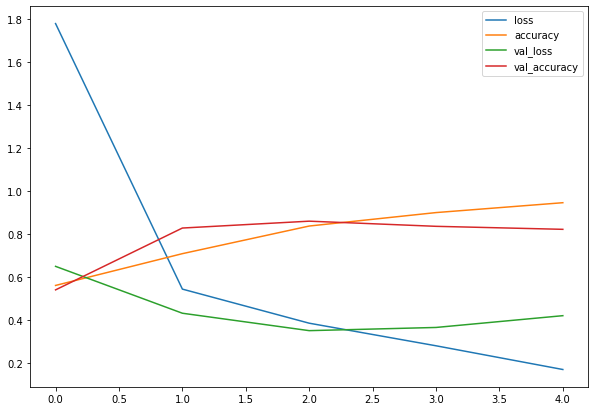

In [27]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [28]:
# Plot the validation and traning curves separately 
def plot_loss_curves(history):
  """
  return separate loss curves for traning and validation metrics
  """
  loss= history.history['loss']
  val_loss=history.history['val_loss']
  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']
  # how many epoch we run
  epoch=range(len(history.history["loss"]))
  plt.plot(epoch,loss,label="traning_loss")
  plt.plot(epoch,val_loss,label="val_loss")
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()


  plt.figure()
   
  plt.plot(epoch,accuracy,label="accuracy")
  plt.plot(epoch,val_accuracy,label="val_accuracy")
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

>🔑**Note** When a model's  **validation loss starts to increase**, it's likely that it's ***overfitting the training dataset***. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

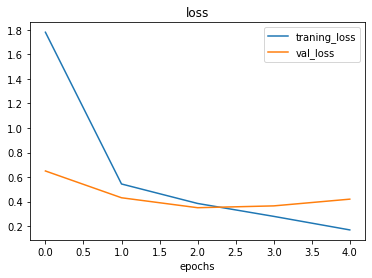

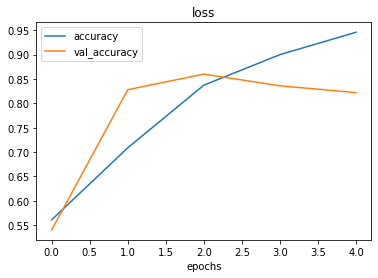

In [29]:
plot_loss_curves(history_4)

### 6. Adjust the model parameters

fitting  a machine learning model comes in 3 steps:

0. create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting 


ways to induce over fitting


* Increase the number of conv layer
* Increase the number of filters
* Add another dense layer to the output of flattened layers


Reduce overfitting


* Add data augmentation
* Add regularization layer (such as MaxPool2D)
* Add more data..

>🔑**Note:** Reducing overfitting is also known ad **regularization**

In [30]:
# Create the model (this is going to be our new baseline)
model_5=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [31]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])

In [32]:
# Fit the model
history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 192ms/step - loss: 0.6258 - accuracy: 0.6307 - val_loss: 0.4996 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4753 - accuracy: 0.7867 - val_loss: 0.3833 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4418 - accuracy: 0.8007 - val_loss: 0.3511 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 9s 202ms/step - loss: 0.4108 - accuracy: 0.8147 - val_loss: 0.3436 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4025 - accuracy: 0.8273 - val_loss: 0.3375 - val_accuracy: 0.8640


In [33]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [34]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


>🔑 *Note:* **MaxPooling layer take the max value from a nXn matrices and reduce the size of Matrices  in other words it take most important features from image**

therefore we can notice that model_5 is performing way better than model_4 despite it has less parameter than model_4 


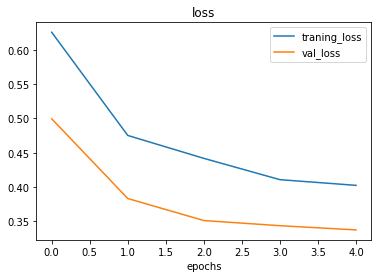

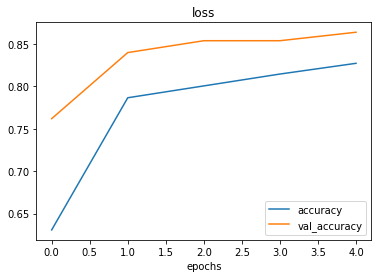

In [35]:
plot_loss_curves(history_5)

### **Data augmentation**

In [36]:
# creating ImageDataGenerator training instance with data augmentation
train_datagen_aug=ImageDataGenerator(rescale=1/255,
                                     rotation_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     width_shift_range=0.2,
                                     height_shift_range=0.3,
                                     horizontal_flip=True)

# create ImageDataGenerator without data augmentation
train_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

>**Data augmentation** is the process of altering our training data ,leading it to have more diversity and in turn allowing our model to learn more generalizable pattern. Altering might mean adjusting the rotation of an image,flipping it, cropping it or somthing similar 

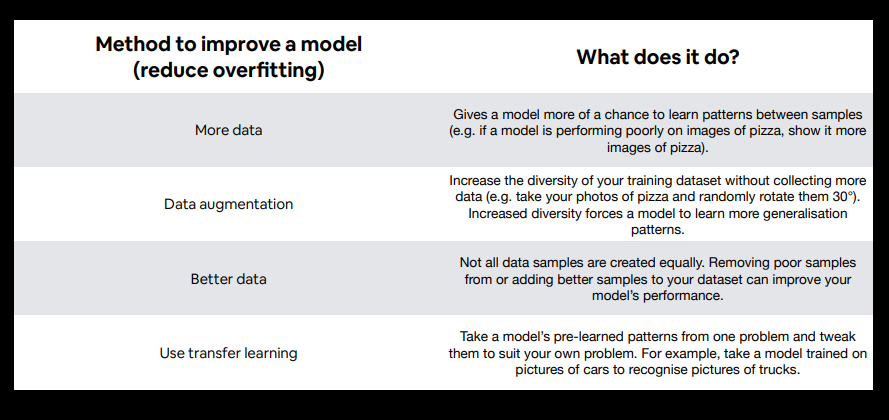

In [38]:
# Import data abd augment it from training directory
print("augmented traning data")
train_data_augmented=train_datagen_aug.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode='binary',
                                                                 shuffle=False)

# create non-augmented train data batches
print("non-augmented traning data")
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary',
                                             shuffle=False
                                             )

print("non-augmented test data")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="binary")

augmented traning data
Found 1500 images belonging to 2 classes.
non-augmented traning data
Found 1500 images belonging to 2 classes.
non-augmented test data
Found 500 images belonging to 2 classes.


>**🔑Note**: Data augmentation is usually *only performed on the traning data* using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded in the model

In [ ]:
# Get sample data batches
images,labels=train_data.next()
augmented_images,augmented_labels=train_data_augmented.next() 
# Note: labels are not augmented only images are